# Cadeia de Markov

Cadeia de Markov no aprendizado por reforço é uma maneira de modelar o ambiente no qual um agente toma decisões sequenciais, levando em consideração a incerteza nas transições entre estados. Essa modelagem ajuda o agente a tomar decisões que maximizem sua recompensa ao longo do tempo.

# Importando as bibliotecas

In [1]:
import networkx as nx
import matplotlib.pyplot as plt


# Criando o Grafo

Criamos um objeto de grafo direcionado usando a classe DiGraph do NetworkX. 
Em uma Cadeia de Markov, os estados são representados como nós e as transições entre estados como arestas.

In [2]:
G = nx.DiGraph()

# Definindo os estados

Definimos os estados possíveis do nosso sistema. Cada estado é representado como um par de valores (0, 0), (0, 1), (1, 0) e (1, 1). Neste exemplo, estamos modelando um sistema com quatro estados.

In [3]:
estados = [(0, 0), (0, 1), (1, 0), (1, 1)]

Adicionamos os estados como nós ao nosso grafo.

In [4]:
G.add_nodes_from(estados)

# Definindo Probabilidades de Transição

Aqui, definimos as probabilidades de transição entre os estados. Cada entrada no dicionário transicoes representa o estado atual como a chave e um subdicionário das transições possíveis como o valor. As probabilidades são atribuídas às transições entre estados.

In [5]:
transicoes = {
    (0, 0): { (0, 0): 0.55, (0, 1): 0.20, (1, 0): 0.25 },
    (0, 1): { (0, 0): 0.30, (0, 1): 0.45, (1, 1): 0.25 },
    (1, 0): { (0, 0): 0.25, (1, 0): 0.55, (1, 1): 0.20 },
    (1, 1): { (1, 0): 0.30, (0, 1): 0.25, (1, 1): 0.45 },
}


# Adicionando Arestas Ponderadas ao Grafo

Agora, adicionamos as arestas ponderadas ao grafo. Cada aresta representa uma transição entre estados com uma probabilidade específica.

In [6]:
for estado_atual, transicoes_prob in transicoes.items():
    for prox_estado, prob in transicoes_prob.items():
        G.add_edge(estado_atual, prox_estado, weight=prob)


Determinamos a posição dos nós no espaço para criar uma visualização mais organizada. Neste caso, usamos uma disposição circular para posicionar os nós.

In [7]:
pos = nx.circular_layout(G)


# Obtendo as Probabilidades como Rótulos das Arestas
Aqui, coletamos as probabilidades de transição e as formatamos para que possam ser usadas como rótulos nas arestas do gráfico.

In [8]:
labels = {(i, j): f"{G[i][j]['weight']:.2f}" for i, j in G.edges()}


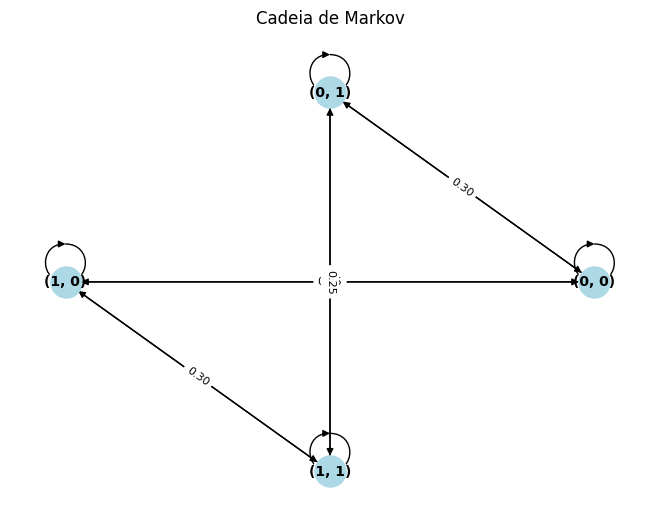

In [9]:
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)
plt.title("Cadeia de Markov")
plt.axis('off')
plt.show()
